<a href="https://colab.research.google.com/github/Chanura04/Maths-CW/blob/main/2425579.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Modelling Travel Time

In [455]:
import sympy as sp
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sympy import latex
from IPython.display import display, Math
import cv2
from scipy.signal import find_peaks

In [456]:
x=sp.symbols('x')
y=sp.symbols('y')
a=sp.symbols('a')
b=sp.symbols('b')
c=sp.symbols('c')
T=sp.symbols('∇T')

In [457]:
T_b=a *( x**2) + b * (y**2)
print(f"T_b(x,y)=\n")
sp.simplify(T_b)


T_b(x,y)=



a*x**2 + b*y**2

In [458]:
T_t= sp.sqrt(c * (x **2 + y**2))
print("T_t(x,y)=\n")
sp.simplify(T_t)


T_t(x,y)=



sqrt(c*(x**2 + y**2))

In [459]:
diff_T_b_by_x=sp.diff(T_b,x)
print("Partial derivative of travelling time by bus ,with respect to x  \n")

print(f"∂T/∂x= {latex(diff_T_b_by_x)}")

Partial derivative of travelling time by bus ,with respect to x  

∂T/∂x= 2 a x


In [460]:
diff_T_b_by_y=sp.diff(T_b,y)
print("Partial derivative of travelling time by bus ,with respect to y  \n")

print(f"∂T/∂y= {latex(diff_T_b_by_y)}")

Partial derivative of travelling time by bus ,with respect to y  

∂T/∂y= 2 b y


In [461]:
#Calculate Gradient value for bus
gradient_latex = f"{T}_b =( {latex(diff_T_b_by_x)} , {latex(diff_T_b_by_y)})"
print(gradient_latex)

∇T_b =( 2 a x , 2 b y)


In [462]:
diff_T_t_by_x=sp.diff(T_t,x)
print("Partial derivative of travelling time by taxi ,with respect to 𝑥  \n")
print(f"∂T/∂x= \n")
sp.simplify(diff_T_t_by_x)

Partial derivative of travelling time by taxi ,with respect to 𝑥  

∂T/∂x= 



x*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [463]:
diff_T_t_by_y=sp.diff(T_t,y)
print("Partial derivative of travelling time by taxi ,with respect to y  \n")
print(f"∂T/∂y= \n")
sp.simplify(diff_T_t_by_y)

Partial derivative of travelling time by taxi ,with respect to y  

∂T/∂y= 



y*sqrt(c*(x**2 + y**2))/(x**2 + y**2)

In [464]:
#Calculate Gradient value for taxi
gradient_latex = f"\\nabla T_t = \\left( {latex(diff_T_t_by_x)},\\ {latex(diff_T_t_by_y)} \\right)"
display(Math(gradient_latex))

<IPython.core.display.Math object>

### Interpretation for bus travel time

In [465]:
rate_for_bus=diff_T_b_by_x / diff_T_b_by_y
sp.simplify(rate_for_bus)

a*x/(b*y)

```
x = total route distance (in km)
```

```
y = traffic delay factor (in minutes per km)
```


   
**For this problem x= 4.5km is fixed.**

if a>>b, that represent longer route have bigger effect on travel time than congestion.

if b>>a, that represent congestion and stop related delays have much bigger effect than distance.

  *    Since the problem specifies that the bus route include multiple stops, the stops related to delays and traffic delays contribute to the y. Therefore y represent the overall higher impact.


### Interpretation for taxi travel time

In [466]:
rate_for_taxi=diff_T_t_by_x / diff_T_t_by_y
sp.pprint(rate_for_taxi)

x
─
y




*  According to result x and y has similar impact from 'c'. But in the problem distance has approximately fixed value. which is 4.5 km. However the only way for impact to travel time is variation of traffic delay.
Finally the y has greater impact for  taxi travel time.



## 2. Cost Analysis Using Integration

#### a)

In [467]:
t=sp.symbols('t')
bus_express= 2 * t + 1
taxi_express= 3 * t + 2

print(f"F_bus =>  ∫ ( {latex(bus_express)} )dt  , Limit 0 to x \n")
print(f"F_taxi =>  ∫ ( {latex(taxi_express)} )dt  , Limit 0 to x")

F_bus =>  ∫ ( 2 t + 1 )dt  , Limit 0 to x 

F_taxi =>  ∫ ( 3 t + 2 )dt  , Limit 0 to x


In [468]:
f_bus=sp.integrate(bus_express,(t,0,x))
print(f"f_bus = {latex(f_bus)}")

f_bus = x^{2} + x


In [469]:
f_taxi=sp.integrate(taxi_express,(t,0,x))
print(f"f_taxi = \n\n")
sp.simplify(f_taxi)

f_taxi = 




x*(3*x + 4)/2

#### b)

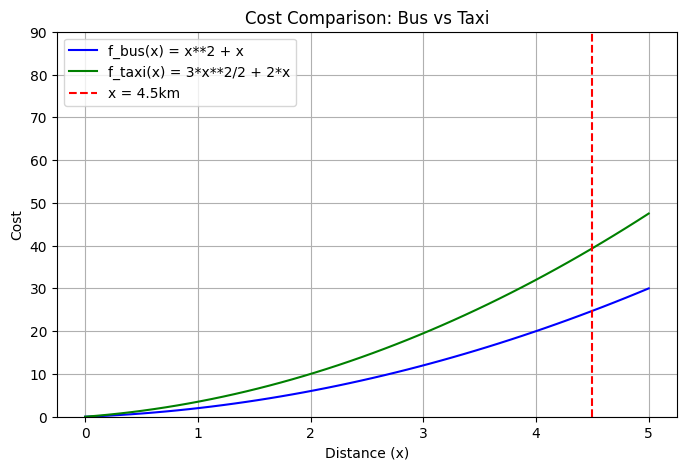

In [470]:
#Create spaced values
x_vals = np.linspace(0, 5)

#Use sp.lambdify to convert symbolic expressions to numerical functions
f_bus_np = sp.lambdify(x, f_bus, "numpy")
f_taxi_np = sp.lambdify(x, f_taxi, "numpy")

#Apply distance values for functions
y_vals_bus = f_bus_np(x_vals)
y_vals_taxi = f_taxi_np(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals_bus, label=f"f_bus(x) = {f_bus}", color='blue')
plt.plot(x_vals, y_vals_taxi, label=f"f_taxi(x) = {f_taxi}", color='green')
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=1.5, label='x = 4.5km')
plt.ylim(0, 90)
plt.legend()

plt.grid(True)
plt.title("Cost Comparison: Bus vs Taxi")
plt.xlabel("Distance (x)")
plt.ylabel("Cost")
plt.show()

#### c)

In [471]:
#simplyfy the ratio
simplified_expr=sp.simplify(f_taxi/f_bus)

#simplifie fraction into numerator aand denominator
quotient, remainder = sp.div(simplified_expr.as_numer_denom()[0], simplified_expr.as_numer_denom()[1], domain='QQ')

print(f"f_taxi / f_bus= {quotient} ")

f_taxi / f_bus= 3/2 


```
f_taxi = 1.5 * f_bus
```

Acorss both short and long-distance journeys, bus transportation  proves to be more cost effective. because taxi cost function is uniformly 1.5 times greater than the corresponding bus cost function.

## 3.Predicting Peak Travel Times Using Series Convergence

#### a)

In [472]:
t=sp.symbols("t")

In [473]:
passenger_volume= 5 + 4* sp.sin(sp.pi*t) - (sp.Rational(3,2))  * (t)**2 + (t**4)/4
# sp.simplify(passenger_volume)
passenger_volume

t**4/4 - 3*t**2/2 + 4*sin(pi*t) + 5

#### b)

In [474]:
p_func=sp.lambdify(t,passenger_volume,"numpy") # symbolic expression to numeric function
time_vals=np.linspace(0,24,500)  # Time range
p_val=p_func(time_vals)   # passenger volumn values

Peak at t = 0.48 hours, Passenger Volume = 8.66


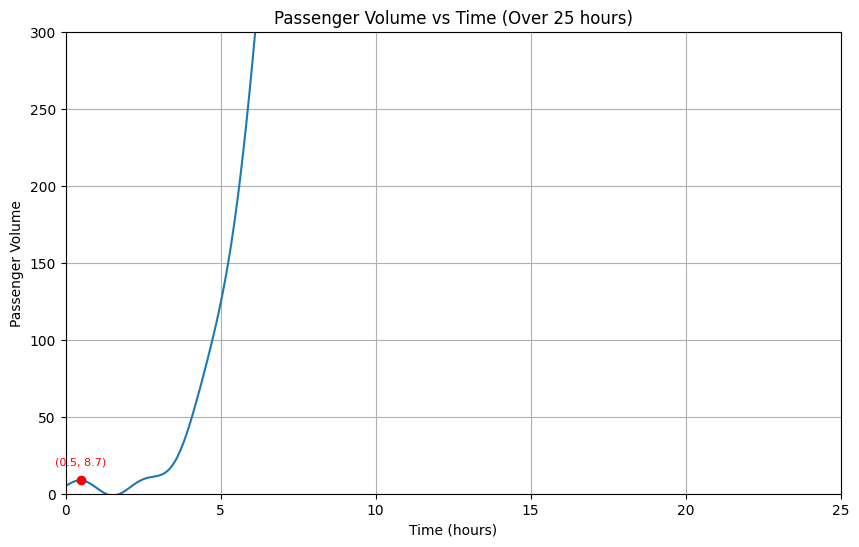

In [475]:
x = time_vals
y = p_val

# Find peaks
peaks, _ = find_peaks(y)

# Get peak coordinates
peak_x = x[peaks]
peak_y = y[peaks]

plt.figure(figsize=(10, 6))
plt.plot(time_vals,p_val)
plt.plot(time_vals[peaks], p_val[peaks], "ro") # red dots at peaks
plt.xlabel("Time (hours)")
plt.ylabel("Passenger Volume")
plt.title("Passenger Volume vs Time (Over 25 hours)")
plt.ylim(0,300)
plt.xlim(0,25)
plt.grid(True)

for i in peaks:
    plt.text(time_vals[i], p_val[i]+10,   # +10 shifts text slightly above the point
             f"({time_vals[i]:.1f}, {p_val[i]:.1f})",
             ha='center', fontsize=8, color="red")


for px, py in zip(peak_x, peak_y):
    print(f"Peak at t = {px:.2f} hours, Passenger Volume = {py:.2f}")

#### c)

In [476]:
for i in np.arange(0.5,11, 0.5): # Use np.arange for float steps
  print(f"Passenger volume at t={i} hours: {p_func(i)}")

Passenger volume at t=0.5 hours: 8.640625
Passenger volume at t=1.0 hours: 3.7500000000000004
Passenger volume at t=1.5 hours: -1.109375
Passenger volume at t=2.0 hours: 2.999999999999999
Passenger volume at t=2.5 hours: 9.390625
Passenger volume at t=3.0 hours: 11.750000000000002
Passenger volume at t=3.5 hours: 20.140625
Passenger volume at t=4.0 hours: 45.0
Passenger volume at t=4.5 hours: 81.140625
Passenger volume at t=5.0 hours: 123.75
Passenger volume at t=5.5 hours: 184.390625
Passenger volume at t=6.0 hours: 275.0
Passenger volume at t=6.5 hours: 391.890625
Passenger volume at t=7.0 hours: 531.75
Passenger volume at t=7.5 hours: 707.640625
Passenger volume at t=8.0 hours: 933.0
Passenger volume at t=8.5 hours: 1205.640625
Passenger volume at t=9.0 hours: 1523.75
Passenger volume at t=9.5 hours: 1901.890625
Passenger volume at t=10.0 hours: 2355.0
Passenger volume at t=10.5 hours: 2882.390625


According to the results, the graph that shows peak at t = 0.48 hours, Passenger Volume = 8.66. Which means around midnight 12:30. After that peak,no more peaks appear. Because 4-term approximation shows unrealistic exponential growth after t > 4 due to the dominance of the t^4 term. However, the polynomial terms like t^4 and t^2 prevents clear identification in graph because term grows fast. As a result, passenger volume is continuously  increase over time, which is not realistic for actual travel pattern.

## 4) Travel Pattern Analysis Using Fourier Transform

#### a)

In [477]:
interval_min = 5
total_hours = 15  # 6 AM to 9 PM
N = int((total_hours * 60) / interval_min) #number of time steps(samples)

# Time array (in hours)
t = np.linspace(0, total_hours, N)

volume_series = p_func(t)

# Fourier Transform (convert time domain into frequency)
fourier_t = np.fft.fft(volume_series)

# Frequency bins
freqs = np.fft.fftfreq(N, d=interval_min*60)

#### b)

/tmp/ipython-input-1518668444.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


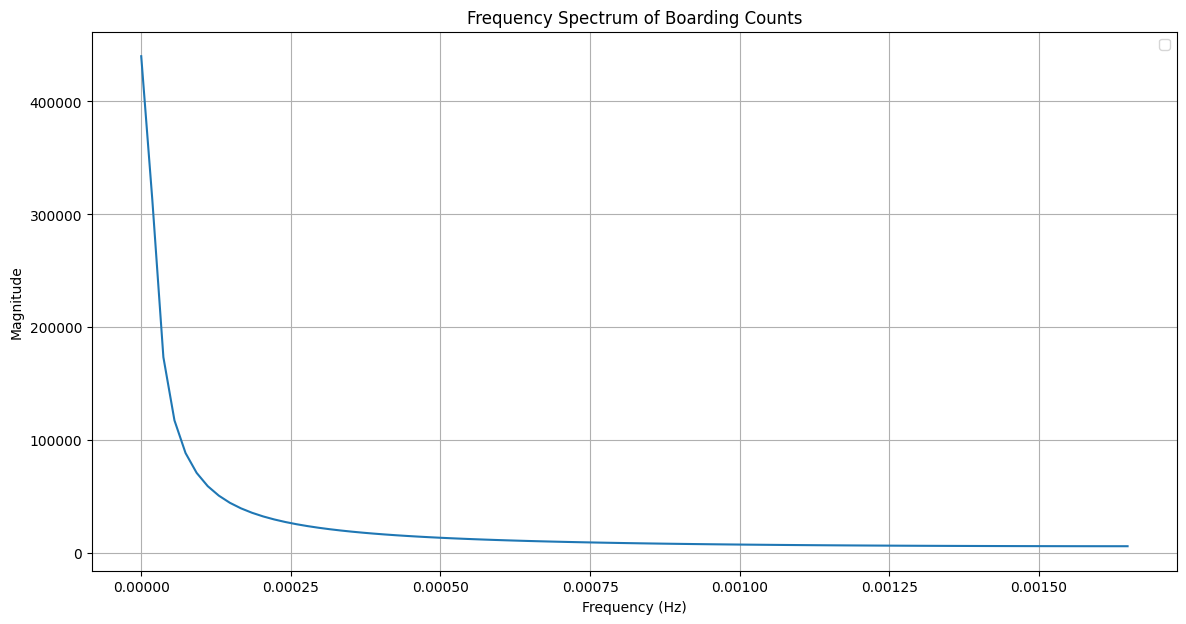

In [478]:
plt.figure(figsize=(14, 7))
plt.plot(freqs[:N//2], np.abs(fourier_t[:N//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Boarding Counts")
plt.legend()
plt.grid(True)

However, Graph shows smooth decreasing curve. Mainly high magnitude peak represent in near to zero frequency. That indicate boarding activity has strong and repeating patterns in morning and evening rush. and also high magnitude represent boarding patterns are dominated by periodic trends and low-frequency correspond to long term trends(daily rush hours). while higher frequencies  capture rapid fluctuations.which means residual noise.In graph daily pattern represent one-cycle,which means morning and evening peaks will happen again tomorrow.

#### c)

However, Fourier analysis confirms that passenger demand follows a strong and repeatable daily pattern rather than random fluctuations. This allows transport operators to schedule more buses and taxis during peak travel periods and reduce service during off peak hours to improve efficiency and passenger experience.



## 5) Image Processing Using Fourier and Discrete Cosine Transforms

### a)

In [479]:
both_plates="https://raw.githubusercontent.com/Chanura04/Maths-CW/main/data/Vehicle_plate.png"
resp_both = urllib.request.urlopen(both_plates) #fetch image data
image_both = np.asarray(bytearray(resp_both.read()), dtype="uint8")   #read the binary data
both_plates_img = cv2.imdecode(image_both, cv2.IMREAD_COLOR)    #decode to image

In [480]:
both_t_rgb=cv2.cvtColor(both_plates_img,cv2.COLOR_BGR2RGB)
full_hight=both_t_rgb.shape[0]
front_plates=both_t_rgb[0:int(full_hight/2.5),:,:] #get 40% from beginning of the array
back_plates=both_t_rgb[int(full_hight/3):,:,:] #From down to top

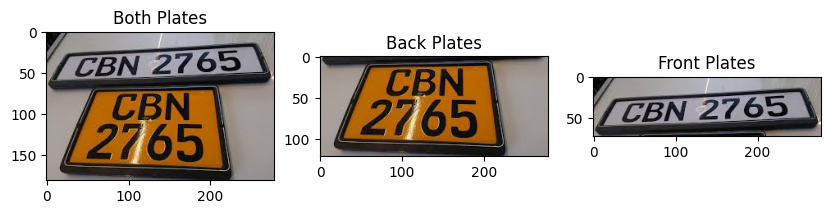

In [481]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(both_t_rgb)
plt.title("Both Plates")

plt.subplot(1,3,2)
plt.imshow(back_plates)
plt.title("Back Plates")

plt.subplot(1,3,3)
plt.imshow(front_plates)
plt.title("Front Plates")
plt.show()

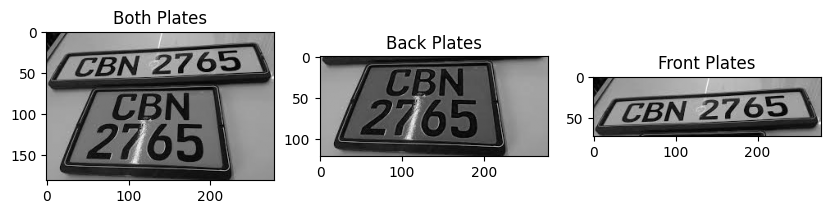

In [482]:
both_t_gray=cv2.cvtColor(both_plates_img,cv2.COLOR_BGR2GRAY)
back_t_gray=cv2.cvtColor(back_plates,cv2.COLOR_BGR2GRAY)
front_t_gray=cv2.cvtColor(front_plates,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(both_t_gray,cmap="gray")
plt.title("Both Plates")

plt.subplot(1,3,2)
plt.imshow(back_t_gray,cmap="gray")
plt.title("Back Plates")

plt.subplot(1,3,3)
plt.imshow(front_t_gray,cmap="gray")
plt.title("Front Plates")
plt.show()


After convert image into grayscale , the front plate was differentiated from the back plate based on aspect ratio and the background appearance. Front plate is wider , horizontally oriented and background is brighter than the back plate. Back plate is more square and vertically oriented. Front plate gives better edges because white background represent less noise , while back plate may produce weaker contour because of the noise.

### b)

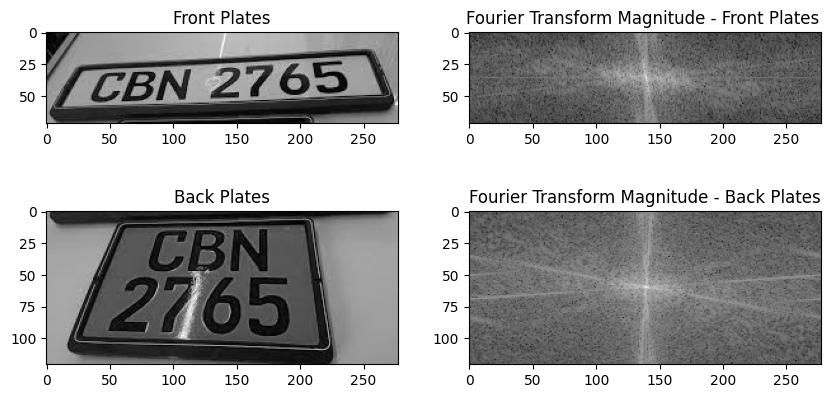

In [483]:
#apply 2D fourier transformer
fourier_transform_front=np.fft.fft2(front_t_gray)
fourier_transform_back=np.fft.fft2(back_t_gray)

#shift the zero frequency to the center
fourier_transform_shift_front=np.fft.fftshift(fourier_transform_front)
fourier_transform_shift_back=np.fft.fftshift(fourier_transform_back)

#apply logarithmic scalling to complex numbers
magnitude_front=np.log(1+np.abs(fourier_transform_shift_front))
magnitude_back=np.log(1+np.abs(fourier_transform_shift_back))

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(front_t_gray,cmap="gray")
plt.title("Front Plates")

plt.subplot(1,2,2)
plt.imshow(magnitude_front,cmap="gray")
plt.title("Fourier Transform Magnitude - Front Plates ")

plt.subplot(2,2,3)
plt.imshow(back_t_gray,cmap="gray")
plt.title("Back Plates")

plt.subplot(2,2,4)
plt.imshow(magnitude_back,cmap="gray")
plt.title("Fourier Transform Magnitude - Back Plates")
plt.show()


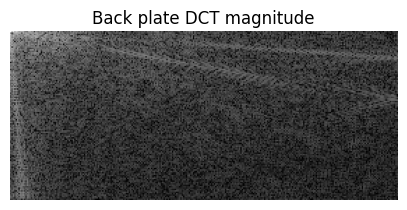

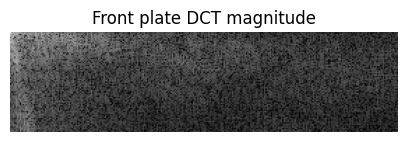

In [484]:
def show_dct(img_gray, title):
   # Normalize to [0,1], float32 for cv2.dct
    g = img_gray.astype(np.float32)
    dct = cv2.dct(g)
    mag = np.log(1 + np.abs(dct))
    plt.figure(figsize=(5,4))
    plt.imshow(mag, cmap='gray')
    plt.title(title)
    plt.axis('off')
show_dct(back_t_gray, "Back plate DCT magnitude")
show_dct(front_t_gray, "Front plate DCT magnitude")

plt.show()

Top-left corner bright area represent low-frequency. that capture overall structure.




### c)

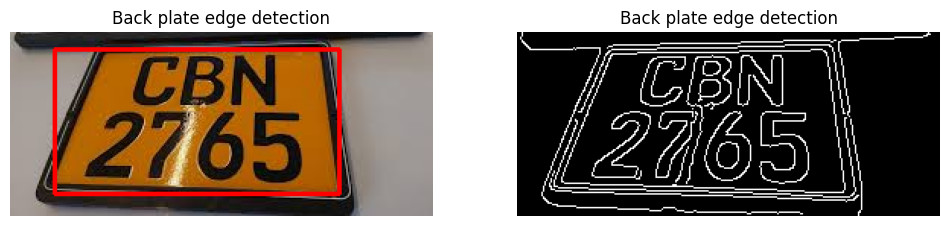

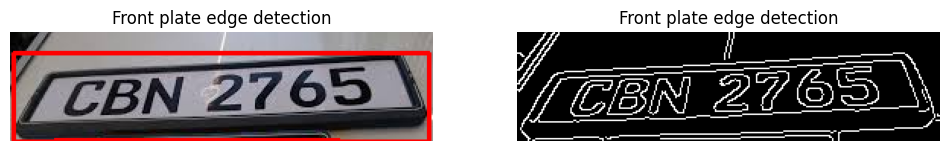

In [485]:
def show_idct(img_gray,orgninal_img, title):
  # Edge detection
  blur = cv2.GaussianBlur(img_gray, (5,5), 0)  #reduce noise
  edges = cv2.Canny(blur, 30, 120)
  # Find continous curve
  continous_curve, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  img_contour =orgninal_img

  # Loop through contours and draw rectangles
  for cnt in continous_curve:
    x, y, w, h = cv2.boundingRect(cnt)  # return smallest rectangle
    aspect_ratio = w / h

    if 1.6 < aspect_ratio < 7 and w > 55 and h >55:
        cv2.rectangle(img_contour, (x, y), (x + w, y + h), (255,0, 0), 2)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(img_contour)
  plt.title(title)
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.imshow(edges, cmap='gray')
  plt.title(title)
  plt.axis('off')

show_idct(back_t_gray,back_plates, "Back plate edge detection")
show_idct(front_t_gray,front_plates, "Front plate edge detection")

plt.show()

### d)

Mainly, transforms reveal underlying structure of the number plate by separating smooth regions from sharp edges and text.In the fourier transform, the central low-frequency components represent the smooth background, while the outer high-frequency components represent sharp edges such as strokes letters and numbers. Overall plate characters are defined by strong high-frequency patterns.
In DCT, that concentrating majority of an images's important information into low-frequnecy, which suitable for image compression and character recognition. However together the transform reveal plate image has smooth background with localized high frequency features where the characters are present.




If we use fourier and DCT together for recognition  it,
  
* Enhance edges and character recognition
* Reduce noise
* Separate  useful plate information from irrelevant background details.
* Enhance plate localization accuracy

Overall, these techniques  lead for traffic optimization. For that this system helps to find,

* Vehicle counting on specific routes  
* Identification of peak traffic periods
* Detecting frequently used routes

finally, system can optimize bus and taxi scheduling based on real traffic demand.









